In [1]:
from sympy import *
from numpy import logspace, pi, angle
import matplotlib.pyplot as plt
%matplotlib inline

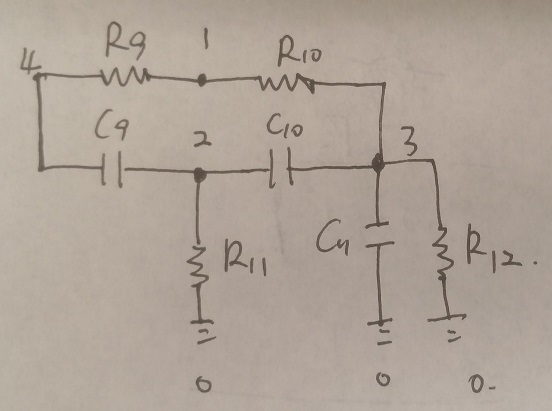

In [2]:
from IPython.display import Image
Image(filename='PZT servo U4.jpg')

In [3]:
## define symbols
V1,V2,V3,V4 = symbols('V1,V2,V3,V4')
i13,i20,i23,i30,i41,i42 = symbols('i13,i20,i23,i30,i41,i42')
R9,R10,R11,R12 = symbols('R9, R10, R11, R12')
C9,C10,C11 = symbols('C9, C10, C11')
w,f = symbols('w,f')

## values for the components
params = {'V4': 1,
          'w': 2*pi*f,
          'R9': 8.2e3,
          'R10': 8.2e3, 
          'R11': 3.9e3,
          'R12': 27e3,
          'C9': 500e-12,
          'C10':500e-12,
          'C11': 2e-9}

In [4]:
## equations of the circuit
eqs = [i41-(V4-V1)/R9,
       i13-(V1-V3)/R10,
       i42-(V4-V2)*1j*w*C9,
       i20-V2/R11,
       i23-(V2-V3)*1j*w*C10,
       i30-V3*(1j*w*C11+1/R12),
       i41-i13,
       i42-i23-i20,
       i30-i23-i13]

In [5]:
## solve the symbolic equations
print('It may take a few seconds to solve the equations.')
sol = solve(eqs,V1,V2,V3,i13,i20,i23,i30,i41,i42)
print('Solved!')

It may take a few seconds to solve the equations.
Solved!


In [6]:
v3 = sol.get(V3).subs(params)
out = lambdify(f,v3)

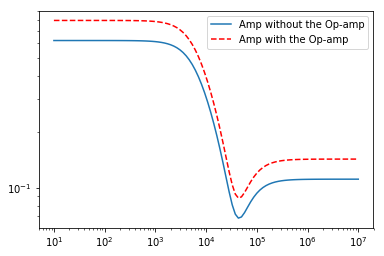

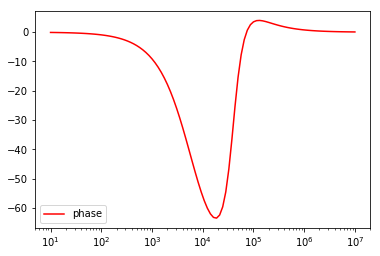

In [7]:
f = logspace(1,7,100) 
y = out(f)
plt.loglog(f,abs(y), label='Amp without the Op-amp');
plt.loglog(f,abs(y)*(18+5.1)/18, 'r',ls='dashed',  label='Amp with the Op-amp')
plt.legend()
plt.figure()
plt.plot(f,angle(y,deg=True),'r', label='phase')
plt.legend()
plt.xscale('log')